In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
omicron_data = pd.read_csv("D:\\omicron_data\\omicron.csv") 
omicron_data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False


In [3]:
omicron_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66168 entries, 0 to 66167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                66168 non-null  int64 
 1   user_name         66168 non-null  object
 2   user_location     51380 non-null  object
 3   user_description  62338 non-null  object
 4   user_created      66168 non-null  object
 5   user_followers    66168 non-null  int64 
 6   user_friends      66168 non-null  int64 
 7   user_favourites   66168 non-null  int64 
 8   user_verified     66168 non-null  bool  
 9   date              66168 non-null  object
 10  text              66168 non-null  object
 11  hashtags          47798 non-null  object
 12  source            66168 non-null  object
 13  retweets          66168 non-null  int64 
 14  favorites         66168 non-null  int64 
 15  is_retweet        66168 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 7.2+ MB


In [4]:
omicron_data['source'].value_counts()[:5]

Twitter Web App        23063
Twitter for Android    15166
Twitter for iPhone     13603
smcapplication          3198
TweetDeck               3005
Name: source, dtype: int64

In [5]:
source_to_replace = ['Twitter Web App', 'Twitter for Android','Twitter for iPhone','Twitter for iPad','Twitter Media Studio','Twitter Media Studio - LiveCut','Twitter for Mac']
omicron_data['source'] = omicron_data['source'].replace(source_to_replace, "Twitter")

In [6]:
# Top 10 platforms to share comments
omicron_data['source'].value_counts()[:10]

Twitter                   54581
smcapplication             3198
TweetDeck                  3005
Hootsuite Inc.             1105
Buffer                      547
WordPress.com               284
dlvr.it                     238
Sprout Social               197
SocialFlow                  135
Hocalwire Social Share      112
Name: source, dtype: int64

In [7]:
#convert into a dataframe
df = omicron_data['source'].value_counts()[:5].rename_axis('source').reset_index(name = 'counts')
df

,source,counts
0,Twitter,54581
1,smcapplication,3198
2,TweetDeck,3005
3,Hootsuite Inc.,1105
4,Buffer,547


In [8]:
omicron_data['user_location'].value_counts()

Los Angeles, CA                   3418
India                             3130
New Delhi, India                   992
London, England                    677
Mumbai, India                      640
                                  ... 
Baden-Württemberg, Deutschland       1
UU (Underground Unvaxxed)            1
Barisal, Bangladesh                  1
Searching...                         1
Hawaon me                            1
Name: user_location, Length: 10363, dtype: int64

In [9]:
# top 10 user locations where we got max comments
df1 = omicron_data['user_location'].value_counts()[:10].rename_axis('source_country').reset_index(name = 'counts')
df1

,source_country,counts
0,"Los Angeles, CA",3418
1,India,3130
2,"New Delhi, India",992
3,"London, England",677
4,"Mumbai, India",640
5,London,519
6,United States,512
7,United Kingdom,504
8,Canada,503
9,New Delhi,481


### Need to do country and Hashtag cleaning due to irregular text (not including in this notebook)

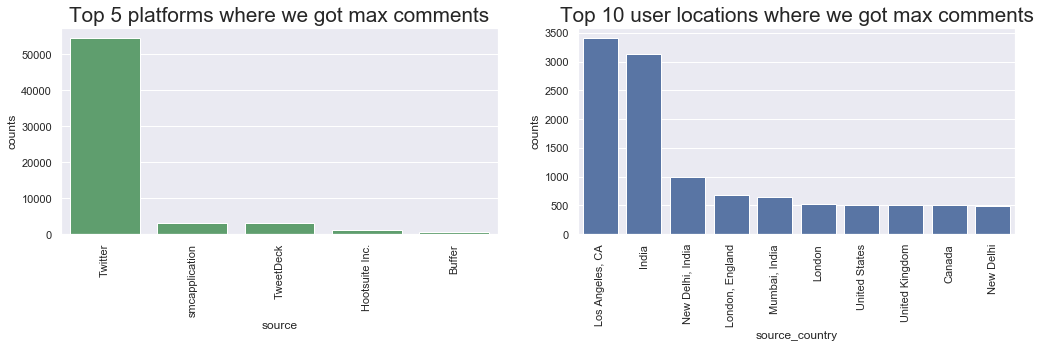

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

sns.barplot(x = 'source', y = 'counts', data = df, color = 'g',ax = ax[0] )
ax[0].set_title('Top 5 platforms where we got max comments', size = 'xx-large')
ax[0].set_xticklabels(df['source'],rotation = 90)

sns.barplot(x = 'source_country', y = 'counts', data = df1, color = 'b',ax = ax[1] )
ax[1].set_title('Top 10 user locations where we got max comments', size = 'xx-large')
ax[1].set_xticklabels(df1['source_country'],rotation = 90)

plt.tight_layout()
plt.show()

In [11]:
# convert str date into datetime stamps
omicron_data['date'] = pd.to_datetime(omicron_data['user_created'])

In [12]:
omicron_data['year'] = omicron_data['date'].dt.year
omicron_data['month'] = omicron_data['date'].dt.month
omicron_data['day'] = omicron_data['date'].dt.day
omicron_data['hour'] = omicron_data['date'].dt.hour

In [13]:
omicron_data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [14]:
omicron_data[['user_created','year', 'month', 'day', 'hour']].head(10)

,user_created,year,month,day,hour
0,2009-09-16 14:30:32,2009,9,16,14
1,2019-12-28 14:29:13,2019,12,28,14
2,2021-07-10 09:40:57,2021,7,10,9
3,2009-05-21 08:32:19,2009,5,21,8
4,2013-12-31 02:57:32,2013,12,31,2
5,2013-09-12 19:39:51,2013,9,12,19
6,2016-09-22 22:54:53,2016,9,22,22
7,2009-10-10 07:16:32,2009,10,10,7
8,2021-08-14 07:19:11,2021,8,14,7
9,2010-11-27 15:34:06,2010,11,27,15


In [15]:
omicron_data[['year', 'month', 'day', 'hour']].columns

Index(['year', 'month', 'day', 'hour'], dtype='object')

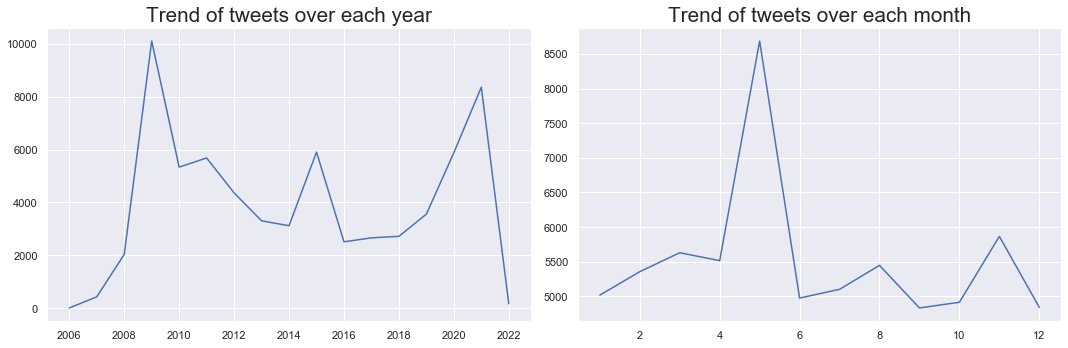

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

omicron_data['year'].value_counts().sort_index(ascending = True).plot(ax = ax[0], kind = 'line')
ax[0].set_title('Trend of tweets over each year', size = 'xx-large')
# ax[0].set_xticklabels(df['source'],rotation = 90)

omicron_data['month'].value_counts().sort_index(ascending = True).plot(ax = ax[1], kind = 'line')
ax[1].set_title('Trend of tweets over each month', size = 'xx-large')
# ax[1].set_xticklabels(df1['source_country'],rotation = 90)

plt.tight_layout()
plt.show()

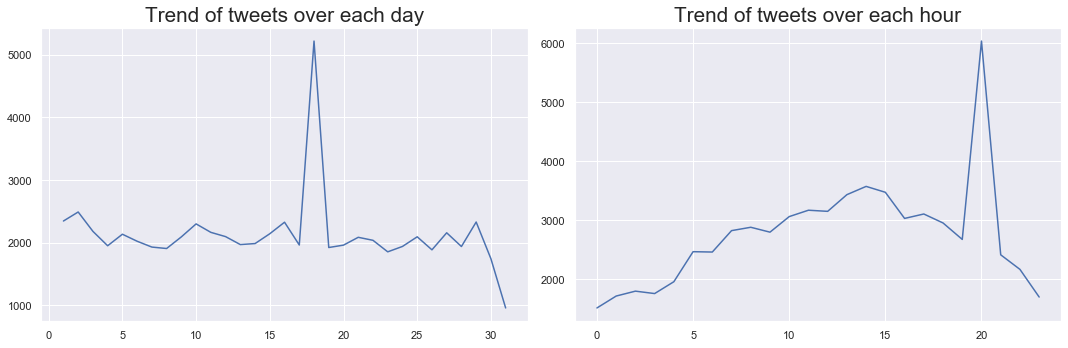

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

omicron_data['day'].value_counts().sort_index(ascending = True).plot(ax = ax[0], kind = 'line')
ax[0].set_title('Trend of tweets over each day', size = 'xx-large')

omicron_data['hour'].value_counts().sort_index(ascending = True).plot(ax = ax[1], kind = 'line')
ax[1].set_title('Trend of tweets over each hour', size = 'xx-large')


plt.tight_layout()
plt.show()

In [18]:
omicron_data['hashtags'] = omicron_data['hashtags'].str.strip('[]').str.replace("'", '')

In [19]:
omicron_data['hashtags'].mode()[0]

'Omicron'

In [20]:
omicron_data['hashtags'] = omicron_data['hashtags'].fillna(omicron_data['hashtags'].mode()[0])

In [21]:
omicron_data['hashtags'] = omicron_data['hashtags'].apply(lambda x : x.split(',')[0])

In [22]:
omicron_data['hashtags'].value_counts()[:20]

Omicron             38462
omicron              3760
COVID19              2799
COVID                 466
Covid19               452
Covid                 411
OmicronVariant        393
covid                 291
BREAKING              277
covid19               273
OmicronVarient        266
OMICRON               262
India                 235
coronavirus           218
BlackLivesMatter      199
UK                    187
Delta                 174
SouthAfrica           174
HDFCLIFE              160
Pfizer                147
Name: hashtags, dtype: int64

### Our objective is to clean Text data and get insights & sentiment analysis

In [23]:
text_data = omicron_data['text']
text_data.head()

0    @SkyNews "Told you I'd be Back!" #OMICRON “Odi...
1    Someone told me this in October #Omicron https...
2    Glad to see the public schoolkids are wrapping...
3    #Automation systems have become increasingly c...
4    🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...
Name: text, dtype: object

In [24]:
text_data = text_data.reset_index()
text_data.head()

,index,text
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi..."
1,1,Someone told me this in October #Omicron https...
2,2,Glad to see the public schoolkids are wrapping...
3,3,#Automation systems have become increasingly c...
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If..."


In [26]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
corpus = []
lemtz = WordNetLemmatizer()

for i in range(0, text_data.shape[0]):
    # remove new lines
    text = text_data['text'][i].replace('\n', ' ')
        # remove links
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
        # remove hashtags at the end of text
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    
    # remove handles
    text = re.sub('@[\w]+', '',text)
    
    # remove punctuations
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '') 
    
    # remove extra spaces
    text = re.sub("\s\s+", " ", text)
    text = re.sub(pattern= '[^a-zA-Z]', repl= ' ', string= text)
    text = text.lower()
    text = text.split()
    text = [ words for words in text if words not in set(stopwords.words('english'))]
    text = [lemtz.lemmatize(words)  for words in text]
    text = ' '.join(text)
    # remove promotional text
    text = re.sub('subscri', '', text)
    corpus.append(text)

In [33]:
corpus[:10]

['told id back omicron odium medicum insensate cretin mean rude',
 'someone told october',
 'glad see public schoolkids wrapping sign permanent psychological damage covid',
 'automation system become increasingly complex effort testing communication interlockin',
 'u think omicron fud long u think omicron threat short join quiz chance',
 'digitaldisruption emerging technology stay private investment space question',
 'covid uk disinformation round time email pretend nh claimi',
 'fatigue head body ache occasional sore throat cough among typical symptom experienced',
 'bcci say india tour south africa track reiterates board compromise player safety',
 'biden vaccine rule health worker blocked state europe china asiapacific indochina southamerica']

In [34]:
# function
def demoji(text):
    
    # frequent emojis which will be kept
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
    for word in text:    
        if re.match(pattern, word):
            continue
            
        # remove all other non ascii characters
        text=text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
        
    return text

In [35]:
text_data['emoji'] = text_data['text'].apply(demoji)

In [42]:
text_data['emoji'][30:40]

30    #omicron seems like excessive panic to me - al...
31    #tuesdaymotivations #TodayInDoom #Biden #Borde...
32    #Omicron  risks new inflation headache for wor...
33    Because Captain Obvious here  #Omicron has bee...
34    @DrTedros @Fruizgomez To die of infection, eat...
35    @ANI #Omicron \n\nToday it's Corona.\n\nTomorr...
36    #FTSE100 eyes worst month in more than 1 year ...
37    Real Village video RAJASTHAN #village tour how...
38    Le scaremongers \n 😂😂😂😂😂\n#Omicron https://t.c...
39    #Omicron - why the WHO designated it a variant...
Name: emoji, dtype: object

In [43]:
def convert(text):
    
    # dictionary of emoji with their meaning
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval',
         '🤨':'suspicion','😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad',
         '🤕':'sad','😔':'sad','😣':'sad','🙁':'sad','😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad',
         '😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad','😩':'sad','🥺':'sad','😦':'sad','😫':'sad',
         '😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection','😁':'smile','😂':'laugh',
         '😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    
    for emoji, sentiment in d.items():
        text=text.replace(emoji, sentiment)
    return text

In [44]:
text_data['sentiment_text'] = text_data['emoji'].apply(convert)

In [46]:
text_data['sentiment_text'][30:40]

30    #omicron seems like excessive panic to me - al...
31    #tuesdaymotivations #TodayInDoom #Biden #Borde...
32    #Omicron  risks new inflation headache for wor...
33    Because Captain Obvious here  #Omicron has bee...
34    @DrTedros @Fruizgomez To die of infection, eat...
35    @ANI #Omicron \n\nToday it's Corona.\n\nTomorr...
36    #FTSE100 eyes worst month in more than 1 year ...
37    Real Village video RAJASTHAN #village tour how...
38    Le scaremongers \n laughlaughlaughlaughlaugh\n...
39    #Omicron - why the WHO designated it a variant...
Name: sentiment_text, dtype: object

In [81]:
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

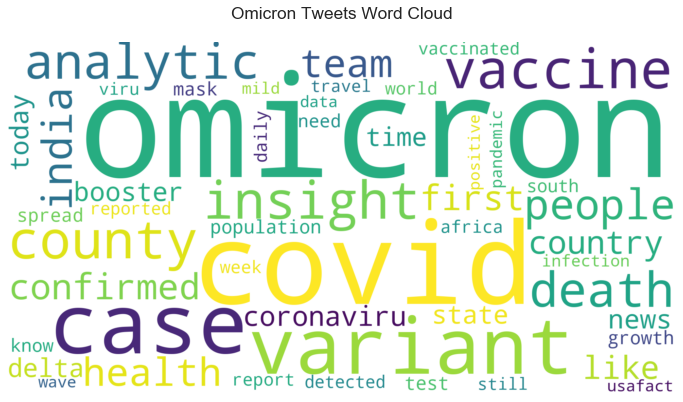

In [50]:
# creating the text variable
text = " ".join(tweet for tweet in corpus)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopwords.words('english'), min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Tweets Word Cloud\n', size='x-large')
# plt.savefig('./omicron_wordcloud.jpg',dpi=720) # saving the image
plt.show()

## Sentiment Analysis

In [51]:
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.util import ngrams

In [52]:
text_data.head()

,index,text,emoji,sentiment_text
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu..."
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t..."


In [53]:
text_data['senti_tokens'] = text_data['sentiment_text'].apply(lambda x : sent_tokenize(x))
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od..."
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ..."


In [54]:
text_data['word_tokens'] = text_data['sentiment_text'].apply(lambda x : word_tokenize(x))
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens,word_tokens
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !..."
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic..."
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ..."
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...,"[#, Automation, systems, have, become, increas..."
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ...","[If, u, think, Omicron, is, a, FUD, ,, you, LO..."


In [56]:
text_data['POS_tokens'] = text_data['word_tokens'].apply(lambda x : pos_tag(x))
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens,word_tokens,POS_tokens
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !...","[(@, JJ), (SkyNews, NNP), (``, ``), (Told, NNP..."
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic...","[(Someone, NN), (told, VBD), (me, PRP), (this,..."
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ...","[(Glad, NNP), (to, TO), (see, VB), (the, DT), ..."
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...,"[#, Automation, systems, have, become, increas...","[(#, #), (Automation, NNP), (systems, NNS), (h..."
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ...","[If, u, think, Omicron, is, a, FUD, ,, you, LO...","[(If, IN), (u, JJ), (think, VBP), (Omicron, NN..."


In [57]:
text_data['tri_grams'] = text_data['word_tokens'].apply(lambda x : list(ngrams(x, 3)))
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens,word_tokens,POS_tokens,tri_grams
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !...","[(@, JJ), (SkyNews, NNP), (``, ``), (Told, NNP...","[(@, SkyNews, ``), (SkyNews, ``, Told), (``, T..."
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic...","[(Someone, NN), (told, VBD), (me, PRP), (this,...","[(Someone, told, me), (told, me, this), (me, t..."
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ...","[(Glad, NNP), (to, TO), (see, VB), (the, DT), ...","[(Glad, to, see), (to, see, the), (see, the, p..."
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...,"[#, Automation, systems, have, become, increas...","[(#, #), (Automation, NNP), (systems, NNS), (h...","[(#, Automation, systems), (Automation, system..."
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ...","[If, u, think, Omicron, is, a, FUD, ,, you, LO...","[(If, IN), (u, JJ), (think, VBP), (Omicron, NN...","[(If, u, think), (u, think, Omicron), (think, ..."


In [58]:
import unicodedata
from textblob import TextBlob

In [59]:
text_data['polarity'] = text_data['sentiment_text'].apply(lambda x : TextBlob(x).sentiment.polarity)
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens,word_tokens,POS_tokens,tri_grams,polarity
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !...","[(@, JJ), (SkyNews, NNP), (``, ``), (Told, NNP...","[(@, SkyNews, ``), (SkyNews, ``, Told), (``, T...",-0.204167
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic...","[(Someone, NN), (told, VBD), (me, PRP), (this,...","[(Someone, told, me), (told, me, this), (me, t...",0.000000
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ...","[(Glad, NNP), (to, TO), (see, VB), (the, DT), ...","[(Glad, to, see), (to, see, the), (see, the, p...",0.166667
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...,"[#, Automation, systems, have, become, increas...","[(#, #), (Automation, NNP), (systems, NNS), (h...","[(#, Automation, systems), (Automation, system...",-0.300000
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ...","[If, u, think, Omicron, is, a, FUD, ,, you, LO...","[(If, IN), (u, JJ), (think, VBP), (Omicron, NN...","[(If, u, think), (u, think, Omicron), (think, ...",-0.025000


In [64]:
text_data[['text','polarity']][30:40]

,text,polarity
30,#omicron seems like excessive panic to me - al...,0.003968
31,#tuesdaymotivations #TodayInDoom #Biden #Borde...,0.136364
32,#Omicron risks new inflation headache for wor...,0.136364
33,Because Captain Obvious here — #Omicron has be...,0.000000
34,"@DrTedros @Fruizgomez To die of infection, eat...",0.000000
35,@ANI #Omicron \n\nToday it's Corona.\n\nTomorr...,0.000000
36,#FTSE100 eyes worst month in more than 1 year ...,-0.250000
37,Real Village video RAJASTHAN #village tour❤ ho...,0.400000
38,Le scaremongers \n 😂😂😂😂😂\n#Omicron https://t.c...,0.000000
39,#Omicron - why the WHO designated it a variant...,0.100000


In [65]:
text_data['opinion'] = [ 'negative' if i<0 else 'positive' if i>0 else 'neutral' for i in text_data['polarity']]
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens,word_tokens,POS_tokens,tri_grams,polarity,opinion
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !...","[(@, JJ), (SkyNews, NNP), (``, ``), (Told, NNP...","[(@, SkyNews, ``), (SkyNews, ``, Told), (``, T...",-0.204167,negative
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic...","[(Someone, NN), (told, VBD), (me, PRP), (this,...","[(Someone, told, me), (told, me, this), (me, t...",0.000000,neutral
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ...","[(Glad, NNP), (to, TO), (see, VB), (the, DT), ...","[(Glad, to, see), (to, see, the), (see, the, p...",0.166667,positive
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...,"[#, Automation, systems, have, become, increas...","[(#, #), (Automation, NNP), (systems, NNS), (h...","[(#, Automation, systems), (Automation, system...",-0.300000,negative
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ...","[If, u, think, Omicron, is, a, FUD, ,, you, LO...","[(If, IN), (u, JJ), (think, VBP), (Omicron, NN...","[(If, u, think), (u, think, Omicron), (think, ...",-0.025000,negative


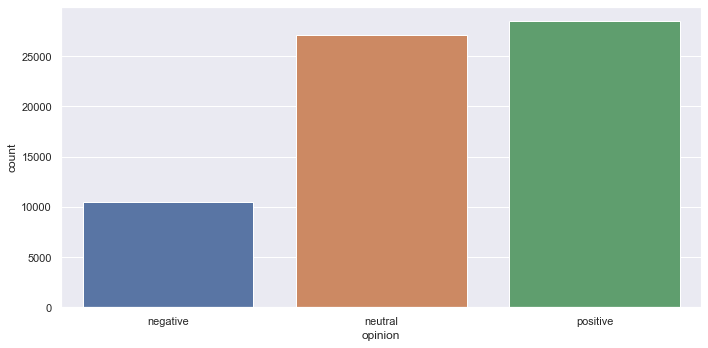

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'opinion', data = text_data)
plt.tight_layout()
plt.show()

In [69]:
text_data['clean_corpus'] = corpus

In [70]:
text_data[['text','clean_corpus']].head()

,text,clean_corpus
0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",told id back omicron odium medicum insensate c...
1,Someone told me this in October #Omicron https...,someone told october
2,Glad to see the public schoolkids are wrapping...,glad see public schoolkids wrapping sign perma...
3,#Automation systems have become increasingly c...,automation system become increasingly complex ...
4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",u think omicron fud long u think omicron threa...


In [73]:
text_data[text_data['polarity']=='positive']['clean_corpus']

Series([], Name: clean_corpus, dtype: object)

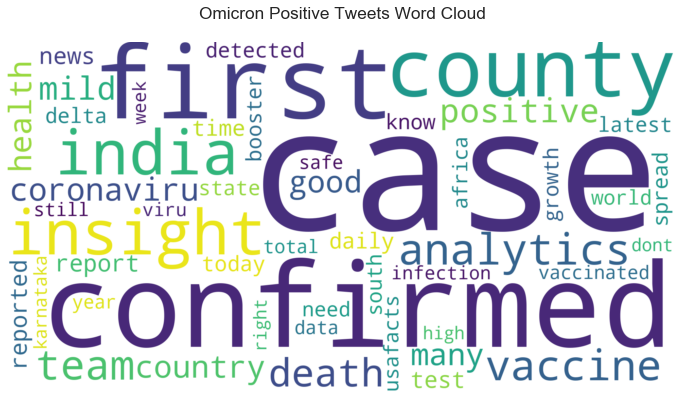

In [82]:
# creating the text variable
text = " ".join(tweet for tweet in text_data[text_data['opinion']=='positive']['clean_corpus'])

stopwords_p = STOPWORDS
stopwords_p.update(('omicron','covid', 'u','ha','amp','one','people','variant','mask'))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopwords_p, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Positive Tweets Word Cloud\n', size='x-large')
# plt.savefig('./omicron_wordcloud.jpg',dpi=720) # saving the image
plt.show()

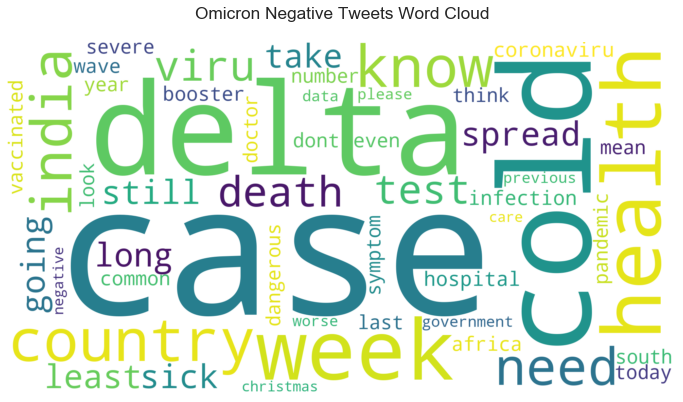

In [83]:
text = " ".join(tweet for tweet in text_data[text_data['opinion']=='negative']['clean_corpus'])

stopwords_p = STOPWORDS
stopwords_p.update(('vaccine','news','im','time','world','travel'))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopwords_p, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Negative Tweets Word Cloud\n', size='x-large')
# plt.savefig('./omicron_wordcloud.jpg',dpi=720) # saving the image
plt.show()

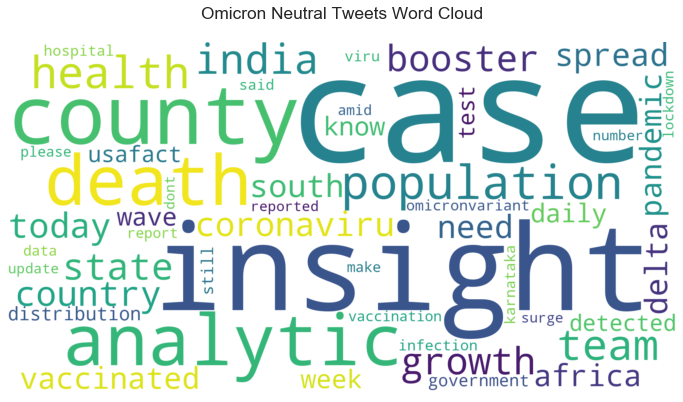

In [84]:
text = " ".join(tweet for tweet in text_data[text_data['opinion']=='neutral']['clean_corpus'])

stopwords_p = STOPWORDS
stopwords_p.update(('omicron','covid', 'u','ha','amp','one','people','variant','mask','vaccine','news','im','time','world','travel'))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopwords_p, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Neutral Tweets Word Cloud\n', size='x-large')
# plt.savefig('./omicron_wordcloud.jpg',dpi=720) # saving the image
plt.show()

In [86]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...


In [90]:
text_data["Positive"] = [SIA.polarity_scores(i)["pos"] for i in text_data["sentiment_text"]]
text_data["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in text_data["sentiment_text"]]
text_data["Negative"] = [SIA.polarity_scores(k)["neg"] for k in text_data["sentiment_text"]]

In [91]:
text_data.head()

,index,text,emoji,sentiment_text,senti_tokens,word_tokens,POS_tokens,tri_grams,polarity,opinion,clean_corpus,polarity_new,Positive,Neutral,Negative
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !...","[(@, JJ), (SkyNews, NNP), (``, ``), (Told, NNP...","[(@, SkyNews, ``), (SkyNews, ``, Told), (``, T...",-0.204167,negative,told id back omicron odium medicum insensate c...,"{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'comp...",0.000,0.892,0.108
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic...","[(Someone, NN), (told, VBD), (me, PRP), (this,...","[(Someone, told, me), (told, me, this), (me, t...",0.000000,neutral,someone told october,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ...","[(Glad, NNP), (to, TO), (see, VB), (the, DT), ...","[(Glad, to, see), (to, see, the), (see, the, p...",0.166667,positive,glad see public schoolkids wrapping sign perma...,"{'neg': 0.221, 'neu': 0.656, 'pos': 0.123, 'co...",0.123,0.656,0.221
3,3,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,#Automation systems have become increasingly c...,[#Automation systems have become increasingly ...,"[#, Automation, systems, have, become, increas...","[(#, #), (Automation, NNP), (systems, NNS), (h...","[(#, Automation, systems), (Automation, system...",-0.300000,negative,automation system become increasingly complex ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000
4,4,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...","If u think Omicron is a FUD, you LONG\n If u t...","If u think Omicron is a FUD, you LONG\n If u t...","[If u think Omicron is a FUD, you LONG\n If u ...","[If, u, think, Omicron, is, a, FUD, ,, you, LO...","[(If, IN), (u, JJ), (think, VBP), (Omicron, NN...","[(If, u, think), (u, think, Omicron), (think, ...",-0.025000,negative,u think omicron fud long u think omicron threa...,"{'neg': 0.227, 'neu': 0.62, 'pos': 0.153, 'com...",0.153,0.620,0.227


In [92]:
text_data.drop('polarity_new', axis = 1, inplace= True)
text_data.head(3)

,index,text,emoji,sentiment_text,senti_tokens,word_tokens,POS_tokens,tri_grams,polarity,opinion,clean_corpus,Positive,Neutral,Negative
0,0,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","@SkyNews ""Told you I'd be Back!"" #OMICRON Odiu...","[@SkyNews ""Told you I'd be Back!"", #OMICRON Od...","[@, SkyNews, ``, Told, you, I, 'd, be, Back, !...","[(@, JJ), (SkyNews, NNP), (``, ``), (Told, NNP...","[(@, SkyNews, ``), (SkyNews, ``, Told), (``, T...",-0.204167,negative,told id back omicron odium medicum insensate c...,0.000,0.892,0.108
1,1,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,Someone told me this in October #Omicron https...,[Someone told me this in October #Omicron http...,"[Someone, told, me, this, in, October, #, Omic...","[(Someone, NN), (told, VBD), (me, PRP), (this,...","[(Someone, told, me), (told, me, this), (me, t...",0.000000,neutral,someone told october,0.000,1.000,0.000
2,2,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,Glad to see the public schoolkids are wrapping...,[Glad to see the public schoolkids are wrappin...,"[Glad, to, see, the, public, schoolkids, are, ...","[(Glad, NNP), (to, TO), (see, VB), (the, DT), ...","[(Glad, to, see), (to, see, the), (see, the, p...",0.166667,positive,glad see public schoolkids wrapping sign perma...,0.123,0.656,0.221


In [113]:
def opinion_score(text_data):
    if (text_data['Positive']>text_data['Negative']) & (text_data['Positive']>text_data['Neutral']):
        return "positive"
    elif (text_data['Negative']>text_data['Positive']) & (text_data['Negative']>text_data['Neutral']):
        return "negative"
    elif (text_data['Neutral']>text_data['Positive']) & (text_data['Neutral']>text_data['Negative']):
        return "neutral"
    else:
        return np.nan

In [114]:
text_data['new_opinion'] = text_data.apply(opinion_score,axis= 1)

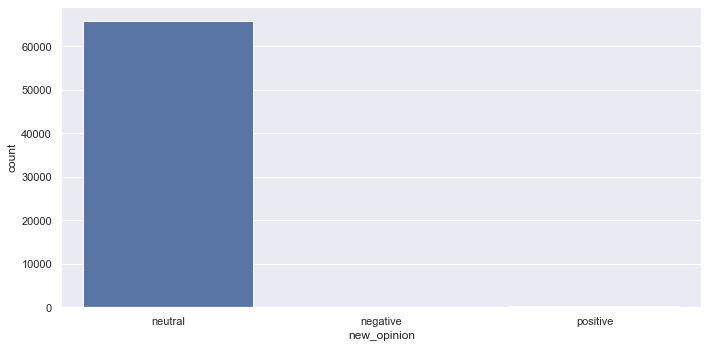

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'new_opinion', data = text_data)
plt.tight_layout()
plt.show()